In [ ]:
print(__doc__)

Automatically created module for IPython interactive environment


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import label_propagation

from sklearn.metrics import confusion_matrix, classification_report


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

In [3]:
indices

array([1081, 1707,  927, ..., 1653,  559,  684])

In [4]:
X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]


In [5]:
n_total_samples = len(y)
n_labeled_points = 30

In [6]:
indices = np.arange(n_total_samples)

In [7]:
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
unlabeled_set = indices[n_labeled_points:]

In [9]:
unlabeled_set

array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

In [10]:
# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1


In [11]:
y_train

array([ 2,  8,  2,  6,  6,  7,  1,  9,  8,  5,  2,  8,  6,  6,  6,  6,  1,
        0,  5,  8,  8,  7,  8,  4,  7,  5,  4,  9,  2,  9, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [12]:
# #############################################################################
# Learn with LabelSpreading
lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


In [13]:
predicted_labels

array([4, 7, 6, 8, 9, 4, 8, 8, 0, 1, 8, 6, 7, 7, 1, 0, 7, 6, 2, 1, 9, 6,
       7, 9, 0, 0, 9, 8, 6, 9, 0, 2, 8, 4, 2, 9, 7, 6, 9, 8, 8, 9, 5, 1,
       2, 1, 2, 2, 9, 7, 2, 9, 6, 0, 5, 8, 7, 5, 1, 2, 9, 4, 9, 1, 7, 7,
       4, 1, 5, 1, 5, 5, 2, 5, 8, 0, 7, 1, 4, 7, 9, 4, 8, 9, 7, 7, 8, 2,
       1, 9, 2, 9, 8, 4, 8, 7, 0, 6, 8, 5, 8, 9, 9, 5, 9, 9, 5, 7, 9, 6,
       2, 8, 6, 9, 6, 1, 5, 8, 5, 9, 9, 1, 9, 9, 6, 8, 8, 4, 1, 7, 6, 7,
       6, 5, 6, 0, 8, 8, 9, 8, 6, 8, 0, 4, 2, 6, 8, 8, 6, 7, 4, 9, 6, 9,
       0, 8, 9, 9, 0, 7, 7, 9, 7, 8, 0, 7, 8, 9, 6, 4, 5, 0, 8, 4, 6, 4,
       9, 8, 0, 9, 5, 9, 2, 1, 4, 7, 1, 6, 1, 9, 2, 4, 9, 8, 7, 6, 2, 9,
       9, 8, 6, 9, 9, 6, 9, 2, 2, 0, 7, 6, 1, 8, 9, 7, 2, 7, 8, 5, 5, 7,
       5, 2, 8, 7, 2, 7, 9, 5, 7, 0, 9, 6, 6, 5, 9, 7, 4, 8, 8, 0, 9, 6,
       4, 6, 9, 2, 6, 1, 8, 8, 1, 6, 7, 5, 2, 1, 5, 9, 2, 1, 6, 9, 4, 5,
       4, 9, 4, 6, 2, 9, 0, 8, 7, 2, 0, 9, 6, 0, 4, 2, 0, 7, 5, 8, 5, 4,
       8, 2, 8, 4, 9, 7, 2, 6, 7, 1, 5, 1, 0, 8])

In [14]:
true_labels

array([4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7, 1, 0, 7, 6, 2, 1, 9, 6,
       7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2, 6, 9, 1, 8, 3, 5, 1,
       2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 9, 9, 3, 1, 7, 7,
       4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7, 3, 4, 8, 9, 7, 9, 8, 2,
       6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9, 9, 5, 9, 9, 5, 7, 5, 6,
       2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6, 7,
       6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 5, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6, 4,
       3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3,
       3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7,
       5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6,
       4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5,
       4, 3, 4, 6, 2, 9, 0, 1, 7, 2, 0, 9, 6, 0, 4, 2, 0, 7, 9, 8, 5, 4,
       8, 2, 8, 4, 3, 7, 2, 6, 9, 1, 5, 1, 0, 8])

In [15]:
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

In [16]:
cm

array([[23,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  2,  0,  0,  1,  0, 11,  0],
       [ 0,  0, 27,  0,  0,  0,  2,  0,  0],
       [ 0,  3,  0, 22,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  8],
       [ 0,  1,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  2,  1,  0,  2,  2, 28]])

In [17]:
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

Label Spreading model: 30 labeled & 300 unlabeled points (330 total)


In [18]:
print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.58      0.50      0.54        28
           2       0.93      0.93      0.93        29
           3       0.00      0.00      0.00        28
           4       0.92      0.88      0.90        25
           5       0.96      0.76      0.85        33
           6       0.97      0.97      0.97        36
           7       0.89      1.00      0.94        34
           8       0.51      0.79      0.62        29
           9       0.51      0.80      0.62        35

    accuracy                           0.77       300
   macro avg       0.73      0.76      0.74       300
weighted avg       0.73      0.77      0.74       300

Confusion matrix
[[23  0  0  0  0  0  0  0  0]
 [ 0 14  2  0  0  1  0 11  0]
 [ 0  0 27  0  0  0  2  0  0]
 [ 0  3  0 22  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  8]
 [ 0  1  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0 34  0  0]
 [ 0  6  0  0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

In [20]:
pred_entropies

array([1.13648638e-084, 1.65645659e-090, 1.58324756e-069, 9.15465886e-081,
       1.53359970e-064, 3.53548772e-079, 1.19974779e-052, 1.78538084e-054,
       2.88692820e-043, 1.56621715e-116, 8.13404400e-074, 9.90554054e-069,
       6.72229904e-059, 6.00076483e-089, 1.15682718e-052, 5.31787261e-074,
       1.89565740e-091, 1.53166096e-081, 1.96890063e-103, 2.02912609e-058,
       1.85544143e-054, 6.52174268e-103, 1.38868556e-042, 2.07961485e-081,
       1.72865708e-081, 1.21249749e-062, 2.94469339e-079, 2.04692549e-042,
       1.56311610e-062, 4.70215303e-045, 2.36910463e-057, 3.72458448e-049,
       4.86133355e-062, 5.83031402e-015, 5.93564132e-035, 4.23991940e-043,
       1.45260975e-012, 3.10529272e-012, 1.65419392e-044, 1.64249196e-073,
       6.29131778e-022, 2.22698684e-055, 5.05978649e-039, 1.64292866e-051,
       4.27779140e-066, 5.13357027e-028, 1.48491392e-054, 1.69079432e-007,
       7.62099489e-051, 3.31254233e-068, 1.50207515e-040, 5.31641887e-055,
       7.35540150e-041, 3

In [21]:
# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

In [22]:
uncertainty_index

array([153, 171, 174, 228, 205,  92, 295, 110, 152,  64])

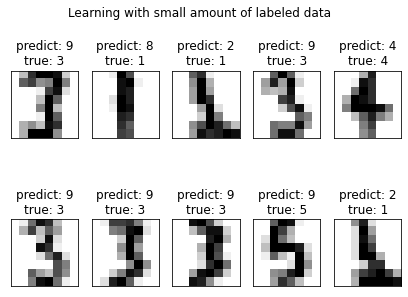

In [23]:
# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()